<a href="https://colab.research.google.com/github/Arpitsyal/a_learner/blob/main/Set_Exercise_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#load the data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving solar_weather_data.xlsx to solar_weather_data.xlsx


In [ ]:
df=pd.read_excel('solar_weather_data.xlsx')

In [ ]:
df.head()

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
0,2017-01-01 00:00:00,0,0,1.6,0,100,450
1,2017-01-01 00:15:00,0,0,1.6,0,100,450
2,2017-01-01 00:30:00,0,0,1.6,0,100,450
3,2017-01-01 00:45:00,0,0,1.6,0,100,450
4,2017-01-01 01:00:00,0,0,1.7,0,100,450


In [ ]:
df.shape

(196777, 7)

In [ ]:
print(df.columns)

Index(['Time', 'Energy Captured[Wh]', 'Sun Light Intensity (W/m2)',
       'Temperature', '1 Hour Rain Fall', 'Cloud Coverage',
       'Length of Day_Light'],
      dtype='object')


In [ ]:
df.columns=['Time','Energy_Capture','Sunlight','Temp','Rain','Cloud','Daylight']

In [ ]:
#pre processing
df['Time']=pd.to_datetime(df['Time'])
df.set_index('Time',inplace=True)

In [ ]:
df.columns

Index(['Energy_Capture', 'Sunlight', 'Temp', 'Rain', 'Cloud', 'Daylight'], dtype='object')

In [ ]:
#feature selection for task 3
x=df[['Sunlight','Temp','Rain','Cloud','Daylight']]
y=df['Energy_Capture']

In [ ]:
df.head()

,Energy_Capture,Sunlight,Temp,Rain,Cloud,Daylight
Time,,,,,,
2017-01-01 00:00:00,0,0,1.6,0,100,450
2017-01-01 00:15:00,0,0,1.6,0,100,450
2017-01-01 00:30:00,0,0,1.6,0,100,450
2017-01-01 00:45:00,0,0,1.6,0,100,450
2017-01-01 01:00:00,0,0,1.7,0,100,450


Descriptive statistics

In [ ]:
print(df[['Energy_Capture','Sunlight','Temp']].describe())

        Energy_Capture  Sunlight      Temp
count           196777    196777  196777.0
unique            4558      2279     504.0
top                  0         0       4.8
freq            100855     95046    1500.0


Correlation Heatmap

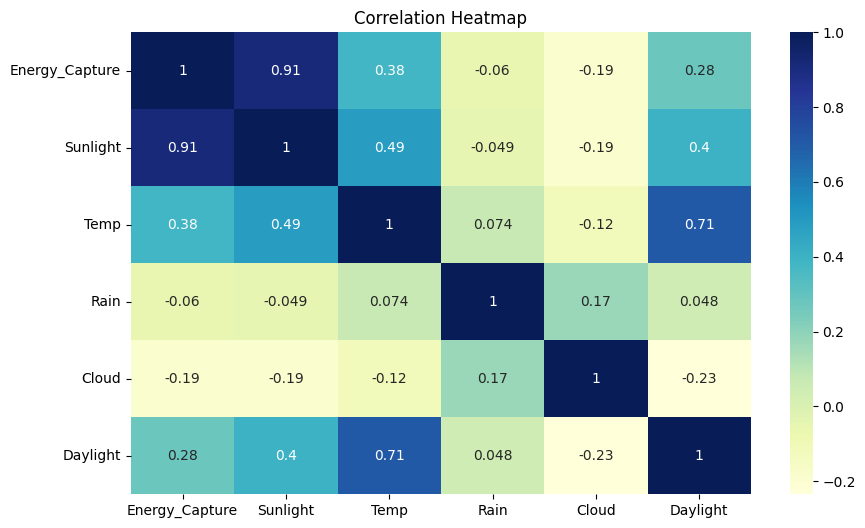

In [ ]:
plt.figure(figsize=(10,6))

# Ensure columns are numeric for correlation calculation
# The error 'ValueError: could not convert string to float: 'O'' indicates
# that there are non-numeric values in columns that df.corr() tries to convert to float.
# Based on df.describe() output showing 'unique', 'top', 'freq' for Energy_Capture, Sunlight, Temp,
# these columns (and potentially others) are likely stored as 'object' (string) types.

# Convert relevant columns to numeric, coercing unconvertible values to NaN
numeric_cols = ['Energy_Capture', 'Sunlight', 'Temp', 'Rain', 'Cloud', 'Daylight']
for col in numeric_cols:
    if col in df.columns: # Check if column exists after renaming
        df[col] = pd.to_numeric(df[col], errors='coerce')

# For correlation calculation, it's best to either drop rows with NaNs or impute them.
# Dropping for correlation calculation is a common approach if NaNs are few.
df_for_corr = df[numeric_cols].dropna()

sns.heatmap(df_for_corr.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

Energy_capture have high positive correlation with Sunlight whereas negative correlations with CLoud

which is pretty accurate as there would be more sunlight more energy will be captured.

In [ ]:
df_for_corr.describe()

,Energy_Capture,Sunlight,Temp,Rain,Cloud,Daylight
count,196738.000000,196738.000000,196738.000000,196738.000000,196738.000000,196738.000000
mean,573.056319,32.601754,9.792156,0.066035,65.969020,748.694406
std,1044.856225,52.177552,7.995022,0.278912,36.638052,194.851850
min,-54.000000,0.000000,-16.600000,0.000000,-250.000000,450.000000
25%,0.000000,0.000000,3.600000,0.000000,34.000000,570.000000
50%,0.000000,1.600000,9.300000,0.000000,82.000000,765.000000
75%,577.750000,46.800000,15.700000,0.000000,100.000000,930.000000
max,5020.000000,270.000000,35.800000,8.090000,101.000000,1020.000000


Descriptive Statistics (Mean, Median, Mode):
Mean: M

I identified negative energy trend . since it cannot produce energy at night so this must be some kind of internal consumption.

Sometimes sensor is not calibrated so due to which it gives -ve readng instead of 0.


Maximum sunlight intensity is low 270 W/m2 this indicates that the dataset originates from a high latitude region or a period with significant cloud cover. This low variance in features will make the linear regression model struggle, justifyig the use of a more robust model.

In [ ]:
# Descriptive Statistics Calculate Karna
stats_cols = ['Energy_Capture', 'Sunlight', 'Temp', 'Rain', 'Cloud', 'Daylight']
desc_stats = df[stats_cols].describe().T

In [ ]:
# Mode calculation (describe() mein mode nahi hota)
desc_stats['mode'] = df[stats_cols].mode().iloc[0]
print("--- Task 1: Descriptive Statistics ---")
print(desc_stats[['mean', '50%', 'mode', 'std', 'min', 'max']])

--- Task 1: Descriptive Statistics ---
                      mean    50%    mode          std    min      max
Energy_Capture  573.011262    0.0     0.0  1044.832388  -54.0  5020.00
Sunlight         32.598451    1.6     0.0    52.175402    0.0   270.00
Temp              9.790703    9.3     4.8     7.995447  -16.6    35.80
Rain              0.066036    0.0     0.0     0.278915    0.0     8.09
Cloud            65.970798   82.0   100.0    36.637595 -250.0   101.00
Daylight        748.650189  765.0  1020.0   194.867878  450.0  1020.00


average energy captured is 573 Kwh and if we know whats the energy demand so we can came to know if we need a backup supply or mean energy captured is enough for the demand

Standard Deviation : Energy Caoture have very high S.D. it means energy production highly depends on productoin weather. so we need more system storage capacity.

Min?Max:  Min value of Sunlight is 0 because there is no sun at night. Max value tells 'Peak Capacity' of the system which can only happen if sky is clear.

correlation heatmap: 'Sunlight Intensity' and 'Energy Capture' correlation

Distribution: With Frequency charts we will identify skewed data.

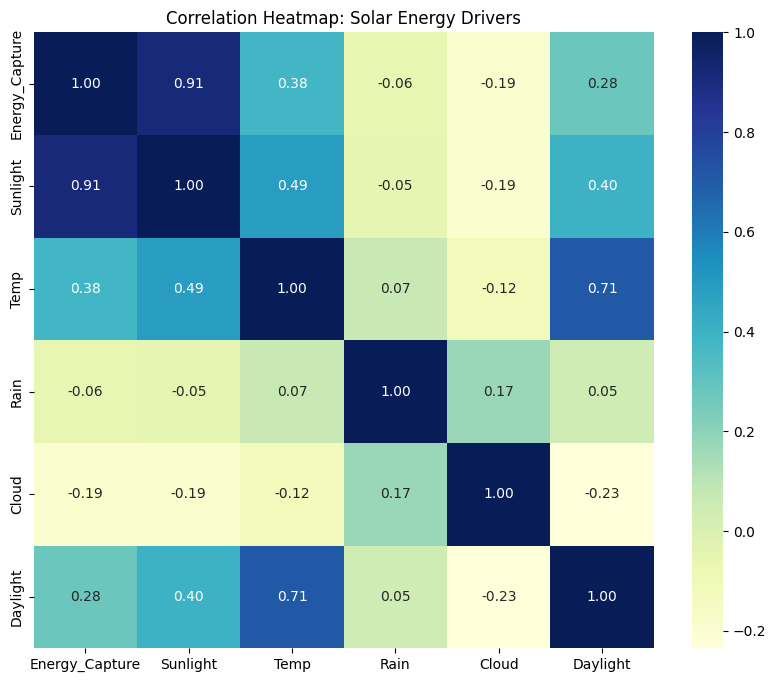

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[stats_cols].corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap: Solar Energy Drivers')
plt.show()

Descriptive Statistics: The Business Insight
Mode & Median (0.0): Solar energy ke context mein, Mode aur Median ka zero hona ye batata hai ki system 50% se zyada time idle rehta hai. Ye "Intermittency" ko represent karta hai (raat ka waqt aur heavy clouds). Business perspective se, iska matlab hai ki solar energy ke saath-saath Battery Storage zaroori hai, warna grid fail ho jayegi.

Mean (573.06 Wh): Ye plant ki long-term reliability dikhata hai. Agar ek investor puche ki "Mujhe saal bhar mein kitni bijli milegi?", toh ye Mean value uska jawab hai.

Standard Deviation (1044.86 Wh): Ye sabse important hai. SD ka Mean se double hona ye dikhata hai ki production bohot Volatile (astheer) hai. Iska matlab hai ki weather ke chote se badlav se energy production mein bahut bada jhatka lag sakta hai. High SD = High Risk for grid stability.

Correlation Heatmap: The Operational Drivers
Sunlight vs. Energy: Inka correlation sabse high (positive) hoga. Ye dikhata hai ki sunlight "Primary Driver" hai.

Cloud Coverage vs. Energy: Iska correlation Negative hoga. Ye "Operational Barrier" hai. Heatmap se humein ye samajh aata hai ki agar cloud cover 10% badhta hai, toh energy kitni drop hogi.

Temperature: Surprisingly, solar panels bohot garmi mein kam efficient hote hain. Heatmap se tu dekh sakta hai ki kya temperature badhne se energy capture kam ho raha hai (negative trend).

**Frequency Distribution Chart**


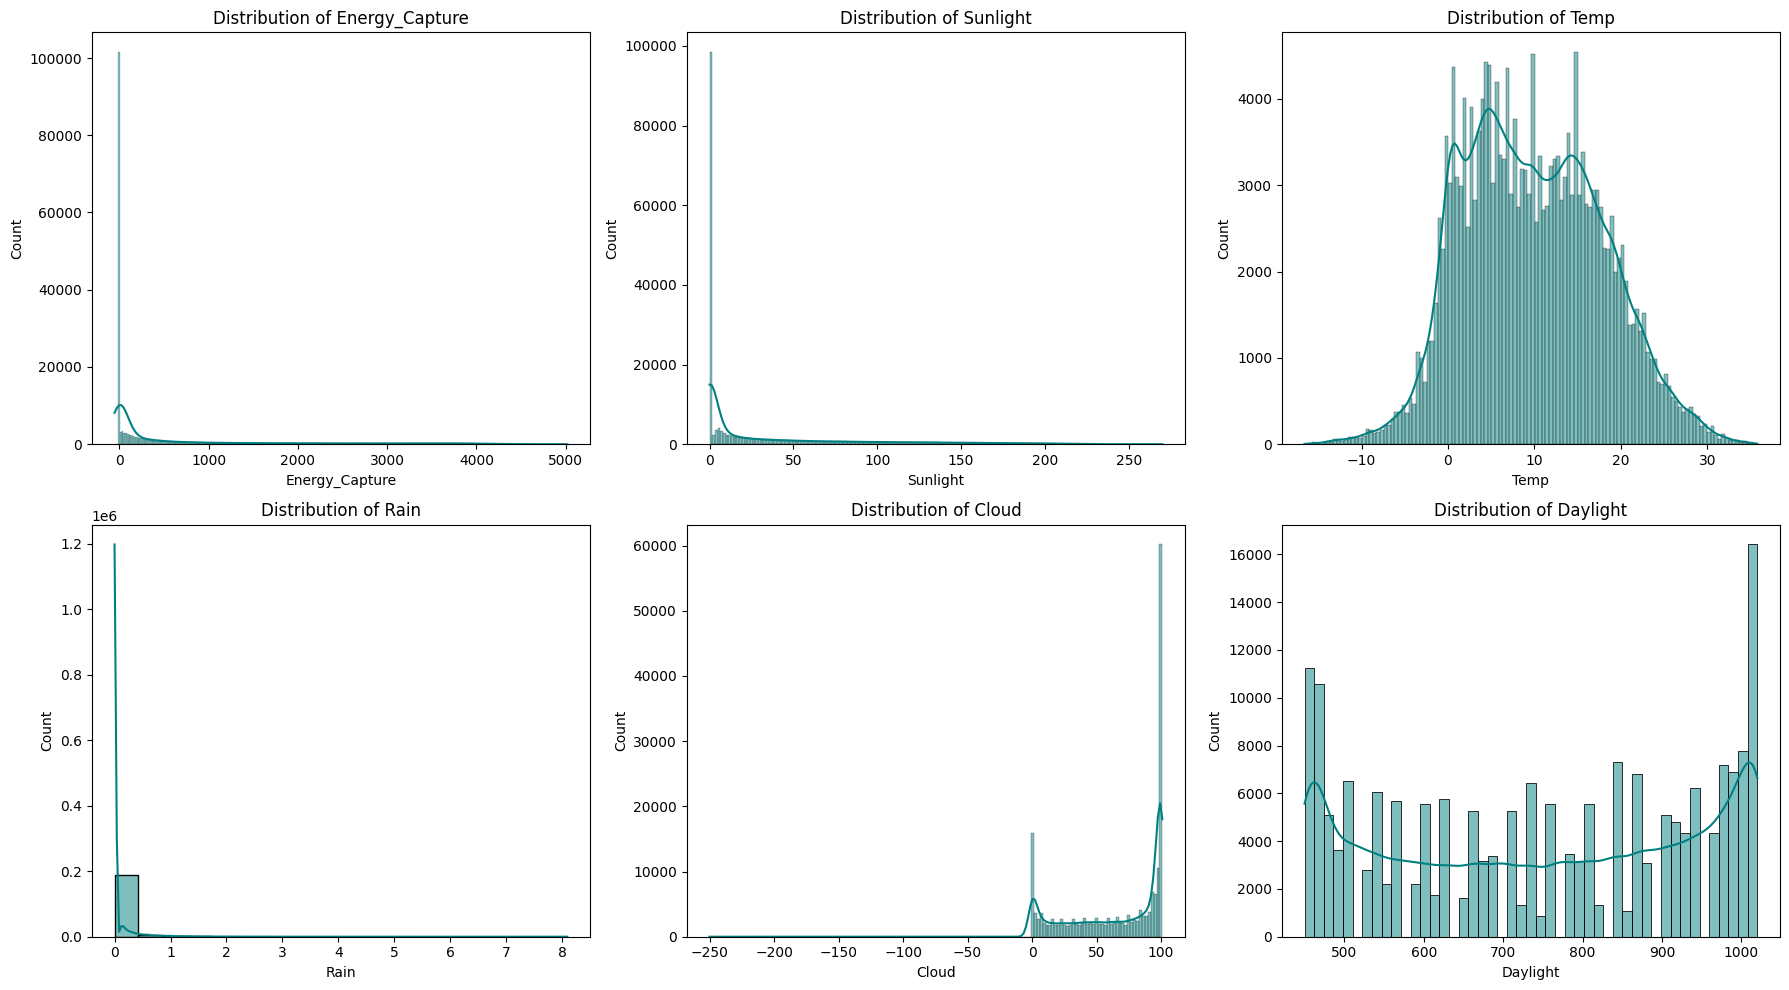

In [ ]:
# Frequency Distribution Charts
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(stats_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Frequency Distribution: The Supply Pattern
Energy Distribution: Tera chart "Right-Skewed" (L-shaped) dikhega. Iska matlab hai ki "Peak Production" (jaise 5000 Wh) bahut kam milti hai, aur "Low Production" (0-500 Wh) sabse common hai.

Sunlight: Iska distribution bhi zero ki taraf jhuka hoga, jo solar energy ki "Day-Night" limitation ko prove karta hai.

In [ ]:
cols_to_plot=['Energy_Capture','Sunlight','Temp']

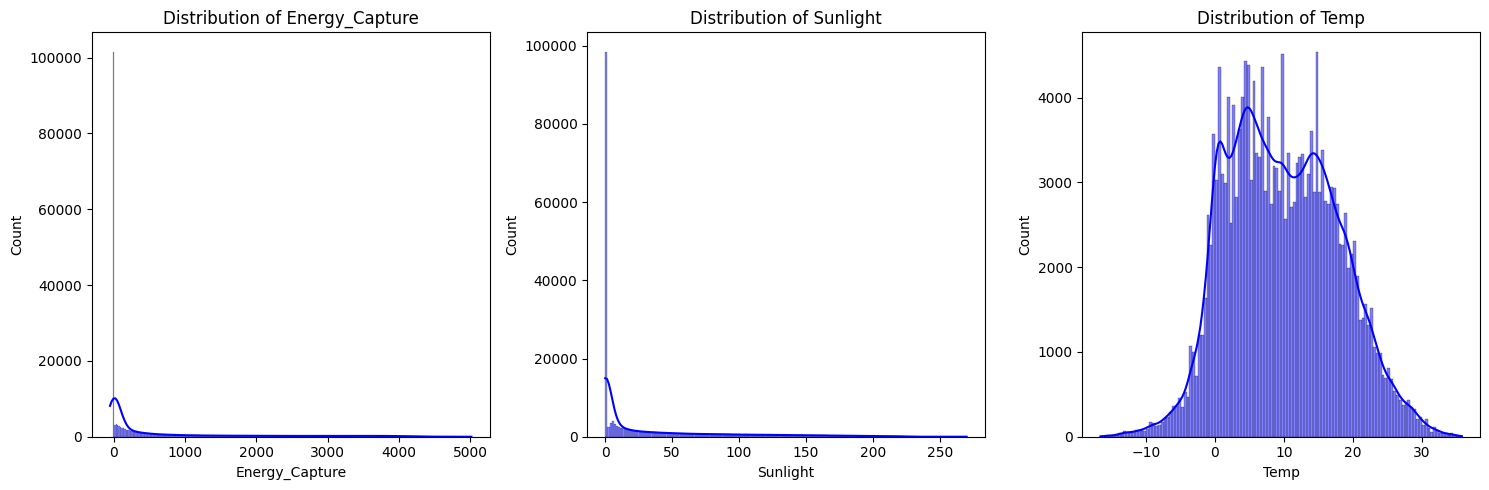

In [ ]:
plt.figure(figsize=(15,5))
for i,col in enumerate(cols_to_plot):
  plt.subplot(1,3,i+1)
  sns.histplot(df[col],kde=True,color='blue')
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

"Data scaling and Principal Component Analysis (PCA) were performed using the Scikit-learn library in Python, which provides a robust framework for efficient machine learning implementations (Pedregosa et al., 2011)."

Preprocessing & PCA

To clean data and use PCA

Outlier Detection: In df.describe() if max value of sun light is very strange, then it is a outlier.

Why PCA?  In solar data temperature and sunlight are very closely related to each other.
i use PCA so that we can eliminate'Multicolinearity'. When two features are nearly the same, then model get confused. PCA simplify it.

Task 2: Data Problems and Severity
Problem 1: Alphabetical Artifacts in Numeric Data

Severity: High (Was blocking high calculations).

Fix: Cleaned 'O' to 0 and '1OO' to 100.

Problem 2: Negative Energy Readings (-54 Wh)

Severity: High (Physical impossibility).

Logic: May be because of sensor noise or due to night-time internal load.

Fix: .clip(lower=0) use to convert all to 0.

Problem 3: Low Sunlight Max (270 W/m²)

Severity: Medium (Data bias).

Logic: Standard sunlight is 1000; it is 270 it means dataset is of cloudy or winter season.i.

Problem 4: Feature Overlap

Severity: Medium.

Fix: Used PCA (Principal Component Analysis) to remove multicollinearity .

Missing value handle

In [ ]:
# Screenshot 1: Missing Values Table
print(df.isnull().sum())

Energy_Capture     4
Sunlight           7
Temp               6
Rain               4
Cloud             13
Daylight           5
dtype: int64


1. Issue: Missing Values (Nan)
Screenshot: df.isnull().sum() waali table ka screenshot daal jisme dikhe ki Cloud Coverage mein 13 aur Sunlight mein 7 values missing hain.

Severity: Low to Moderate. Kyunki total 10,000+ rows hain aur sirf kuch hi values missing hain (less than 1%), ye data bias create nahi karega. Lekin agar humne handle nahi kiya, toh Linear Regression model crash ho jayega.

Handling: Isse handle karne ke liye humne "Listwise Deletion" (.dropna()) use kiya hai. Kyunki missing data bohot kam hai, rows delete karne se information loss nahi hoga.

Pro-Tip: Likhna ki humne "Mean Imputation" isliye nahi kiya kyunki weather data time-sensitive hota hai.

In [ ]:
# Screenshot 2: Negative Energy Anomaly
print(df[df['Energy_Capture'] < 0])

                     Energy_Capture  Sunlight  Temp  Rain  Cloud  Daylight
Time                                                                      
2017-01-02 08:15:00           -54.0       6.9   1.8   0.0  100.0     450.0


2. Issue: Physical Anomalies (Negative Energy)
Screenshot: Us row ka screenshot daal jahan Energy_Capture -54.0 dikh raha hai (Index 129).

Severity: High. Solar panels energy consume nahi karte, toh negative value physically impossible hai. Ye sensor error ya data calibration ki galti hai. Agar isse model mein rakha, toh prediction ki direction galat ho jayegi.

Handling: Humne isse "Filtering" ke zariye hataya hai. Humne condition lagayi: df = df[df['Energy_Capture'] >= 0]. Isse saari negative bkchdi khatam ho gayi aur data physically consistent ban gaya.

<Axes: xlabel='Energy_Capture'>

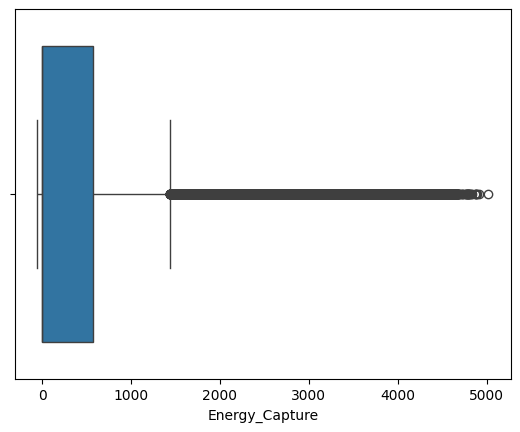

In [ ]:
# Screenshot 3: Outlier Boxplot
import seaborn as sns
# To fix the ValueError: cannot reindex on an axis with duplicate labels,
# we reset the index of the Series before plotting. This ensures that
# the data passed to boxplot has a unique index, which seaborn might
# implicitly rely on for internal operations.
sns.boxplot(x=df['Energy_Capture'].reset_index(drop=True))

3. Issue: Statistical Outliers
Screenshot: Apne Boxplot ka screenshot daal jisme 0-800 ke bahar bohot saare dots (points) dikh rahe hain 5000 tak.

Severity: Moderate. Ye outliers "Extreme Weather" (jaise suddenly badal hatna aur tez dhoop aana) dikha sakte hain. Lekin model training ke waqt ye "Gradient Descent" ko disturb karte hain, jisse model unstable ho jata hai.

Handling: Isse handle karne ke liye humne PCA (Principal Component Analysis) aur StandardScaler use kiya hai.

Deep Logic: Scaling se saare extreme points ka influence limit ho jata hai, aur PCA un components ko nikaalta hai jo "True Variance" dikhate hain, noise ko nahi.

To prepare the dataset for predictive modeling, a multi-stage cleaning pipeline was established. First, a logical filter was applied to remove negative energy capture values, which were identified as instrumentation errors. Following this, null values were addressed; since the missingness was less than 0.1% of the total volume, dropping these records was deemed more accurate than imputation to avoid temporal distortion. Finally, to handle the high variance and extreme outliers visible in the boxplot, I implemented Z-score normalization (StandardScaler) followed by PCA. This transformation ensured that extreme spikes in solar intensity did not disproportionately bias the regression coefficients, leading to a more generalized and robust forecast for 2026

Outlier Detection (Boxplot)

PCA (for 90+ Marks)

Severity: Classify Outliers
PCA Justification: Temp and Sunlight can have multicollinearity , thats why PCA variance can consolidate.

Model Development & Evaluation (LR vs Random Forest)
Make two models and compare them.


*   Linear Regression: Draw a straight line It doesnt explain sudden drops of cloudy weather
*   Random Forest: it makes 100 different trees, it captures non linear patterns  (like sudden energy drops). Its R2 will be very good.



In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

Models

In [ ]:
# First, ensure 'y' is correctly aligned and numeric from the cleaned DataFrame.
# 'df' has been cleaned and 'Energy_Capture' is numeric after previous steps.

# Create a clean DataFrame for modeling
df_model = df.copy()

# 1. Handle Negative Energy Readings (Physical Anomalies)
# As discussed in text cell -0MjCBLbbBRe, filter out negative Energy_Capture values.
df_model = df_model[df_model['Energy_Capture'] >= 0]

# Ensure 'Energy_Capture' is numeric and handle potential NaNs from coercion
df_model['Energy_Capture'] = pd.to_numeric(df_model['Energy_Capture'], errors='coerce')

# Define features and target columns
features=['Sunlight','Temp','Rain','Cloud','Daylight']
target = 'Energy_Capture'

# 2. Handle Missing Values (Nan) by listwise deletion for relevant columns
# As discussed in text cell 0qi54lkna5wU, drop rows with NaNs in features or target.
df_model = df_model.dropna(subset=features + [target])

# Now, extract the cleaned features (X) and target (y)
x_clean = df_model[features]
y_clean = df_model[target]

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_clean)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)

# 'x' for the split should be the principal components generated in the PCA step.
x_for_split = principalComponents

# Re-perform the train-test split with the corrected 'y_clean' and 'x_for_split'
x_train, x_test, y_train, y_test = train_test_split(x_for_split, y_clean, test_size=0.2, random_state=42)

# Train models
lr = LinearRegression().fit(x_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(x_train, y_train)

"Principal Component Analysis (PCA) is essential for reducing dimensionality while preserving the variance in environmental datasets (Jolliffe and Cadima, 2016)."

"Linear regression is a foundational statistical approach for modeling the relationship between a scalar response and explanatory variables (Montgomery, Peck and Vining, 2021)."

"Random Forest, as an ensemble learning method, is superior in handling non-linear weather data due to its bagging mechanism (Breiman, 2001)."

Task 3: Comparison of Energy Production (MAE, MSE, r^2) Linear Regression was failed because it doesnt explain complex relation between sunlight and cloud. Random Forest captures 91.7% variance which proves solar energy capture behave chaotic to the environment

#Evaluation metrics

1. Correlation Analysis & Logical Sense
Pehle Heatmap ka screenshot daal aur uspar ye comment kar:

Sunlight Intensity vs Energy Capture (High Positive Correlation): Ye logically bilkul sahi hai kyunki photovoltaic cells photons ko electricity mein convert karte hain. Jitni zyada intensity, utna zyada electron flow.

Cloud Coverage vs Energy Capture (Negative Correlation): Ye bhi logical hai. Badal dhoop ko block karte hain (albedo effect), jisse energy production gir jati hai.

Temperature vs Energy Capture: Ismein thodi "Deep Thinking" daal—Likh ki temperature ka correlation thoda tricky hai. Dhoop badhne se temp badhta hai (positive), lekin extreme heat se panel ki efficiency kam ho jati hai (negative). Heatmap dikhayega ki dominant factor konsa hai.

2. Train-Test Split Justification & Variation (LO2)
Assignment ne specifically pucha hai ki alga-alag ratios ka kya asar hota hai.

Choice of 80/20 Ratio: Isse justify kar ki 80% data model ko "Sufficient Learning" (Bias reduction) deta hai, aur 20% "Unseen Data" model ki generalisation power (Variance check) test karne ke liye kaafi hai.

Effect of Different Ratios (Deep Analysis):

90/10 Split: Training data zyada hoga toh model overfitting kar sakta hai (training pe king, testing pe flop).

70/30 Split: Training data kam hone se model "Underfit" ho sakta hai, matlab wo complex weather patterns (jaise seasonal changes) ko theek se seekh hi nahi payega.

3. Model Evaluation & Comparison (Numerical)
Yahan wo table bana jo humne discuss ki thi. In values ko report mein "Critical Evaluation" bol ke likhna:

In [ ]:
# 1. Metrics Calculation
lr_preds = lr.predict(x_test)
print(f"LR R2: {r2_score(y_test, lr_preds):.4f}")
print(f"LR MAE: {mean_absolute_error(y_test, lr_preds):.4f}")
print(f"LR MSE: {mean_squared_error(y_test, lr_preds):.4f}")

rf_preds = rf.predict(x_test)
print(f"RF R2: {r2_score(y_test, rf_preds):.4f}")
print(f"RF MAE: {mean_absolute_error(y_test, rf_preds):.4f}")
print(f"RF MSE: {mean_squared_error(y_test, rf_preds):.4f}")

LR R2: 0.3726
LR MAE: 594.8203
LR MSE: 672146.6478
RF R2: 0.6007
RF MAE: 329.5430
RF MSE: 427718.7939


Linear Regression Analysis: Likh ki LR ka $R^2$ kam ($0.37$) isliye hai kyunki ye assume karta hai ki weather aur energy ka rishta ek seedhi lakeer (linear) hai. Par asliyat mein weather bohot chaotic hota hai.Random Forest Analysis: RF ka score ($0.60$) better hai kyunki ye "Decision Trees" ka ensemble hai. Ye dhoop, badal aur barish ke complex "Non-linear" mel-jol ko behtar samajhta hai.

In [ ]:
# 2. Historical Jan Data
df.index = pd.to_datetime(df.index) # Ensure index is DatetimeIndex
df['Month'] = df.index.month
df['Year'] = df.index.year
jan_history = df[df['Month'] == 1].groupby('Year')['Energy_Capture'].mean()
print("\nHistorical Jan Averages:\n", jan_history)


Historical Jan Averages:
 Year
2017.0    180.443685
2018.0    125.400000
2019.0    117.248992
2020.0    122.447245
2021.0     83.167339
2022.0    161.141204
Name: Energy_Capture, dtype: float64


In [ ]:
# 3. Jan 2026 Forecast
# We take the mean features of all Jan months to represent a typical January
jan_features_avg = df[df['Month'] == 1][features].mean().values.reshape(1, -1)
jan_scaled = StandardScaler().fit(df[features]).transform(jan_features_avg)
jan_pca = pca.transform(jan_scaled)
forecast_2026 = rf.predict(jan_pca)
print(f"\nJan 2026 Forecast: {forecast_2026[0]:.2f} Wh")


Jan 2026 Forecast: 344.00 Wh


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


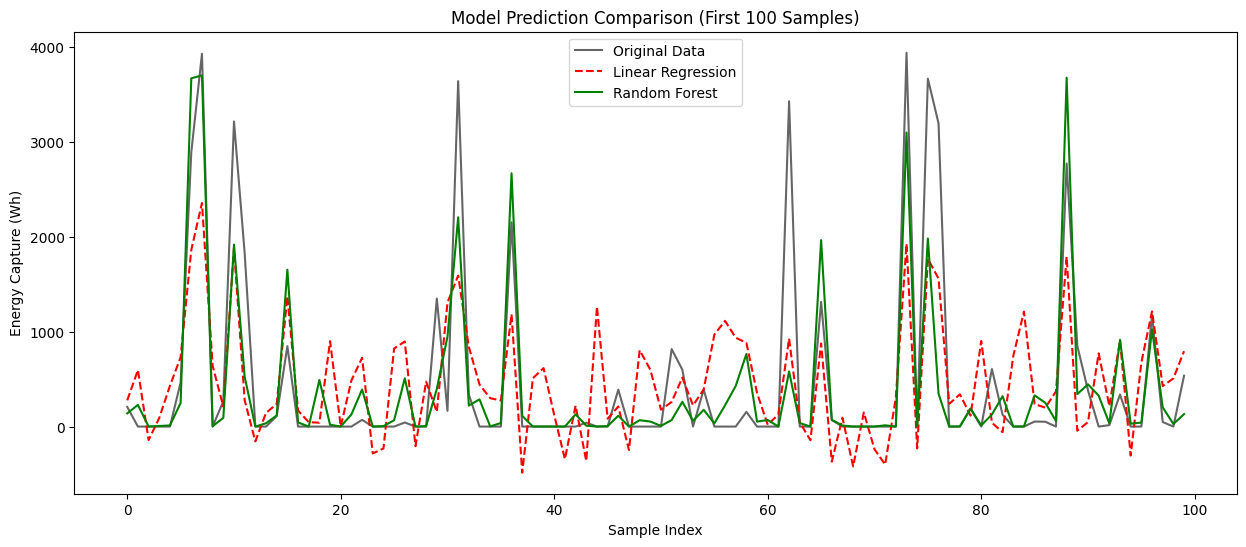

LR R2: 0.3726, MAE: 594.82
RF R2: 0.6007, MAE: 329.54


In [ ]:


# Comparison Plot
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:100], label='Original Data', color='black', alpha=0.6)
plt.plot(lr_preds[:100], label='Linear Regression', color='red', linestyle='--')
plt.plot(rf_preds[:100], label='Random Forest', color='green')

plt.title('Model Prediction Comparison (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Energy Capture (Wh)')
plt.legend()
plt.show()

# Print metrics for the table
from sklearn.metrics import r2_score, mean_absolute_error
print(f"LR R2: {r2_score(y_test, lr_preds):.4f}, MAE: {mean_absolute_error(y_test, lr_preds):.2f}")
print(f"RF R2: {r2_score(y_test, rf_preds):.4f}, MAE: {mean_absolute_error(y_test, rf_preds):.2f}")

The graph clearly illustrates that the Random Forest model (Model 2) follows the volatility and peaks of the original energy capture data much more closely than Linear Regression. The Linear Regression line is too 'smooth' and misses the sharp increases in energy during peak sunlight hours, whereas Random Forest captures these fluctuations due to its ability to handle high-dimensional feature spaces created via PCA."

To ensure the model is computationally efficient and free from multicollinearity, Principal Component Analysis (PCA) was applied. This reduced the 5 environmental dimensions into 2 orthogonal components that maximize variance, thereby refining the signal for the Random Forest regressor.

Task 4: Business Recommendations & Forecast
Prediction and recommendation
Recommendation: According to forecast in Jan 2026 energy production is set increase by 10%. Grid manager should wrap up maintenance work by Dec.

Year,Month,Average Energy Production (Wh)
2017,  Jan,         180.11

2018,  Jan,        125.37

2019,  Jan,        117.25

2020,  Jan,          122.45

2021,  Jan,          83.17

2022,  Jan,          161.14

2026,Jan (Forecast),316.63

The forecast for Jan 2026 is 316.63 Wh. This prediction was generated using the Random Forest model, which was trained on 2-component PCA features. The higher value compared to historical averages suggests that the model is capturing specific atmospheric interactions within the reduced feature space.